# EOSC 511 Lab 8 
##Xiaoxin (Cindy) Yu

## *Problem Three* ## 
>The code provided for [Problem Two](#Problem-Two) implements the SOR relaxation
scheme. Your job in this problem is to modify the relaxation code to
perform a Jacobi iteration.

>Hand in a comparison of the two methods, in tabular form. Use two
different relaxation parameters for the SOR scheme. (Include a list of
the physical and numerical parameter you are using). Also submit your
code for the Jacobi relaxation scheme.

In [1]:
from numlabs.lab8.qg1 import *

**Change to Jacobi Method:**
To change the SOR method to the jacobi one, **I took chi out of the loop (see the last two lines below)** so that the array chi will only update once for every iteration.

>for i in range(1, nx-1):

>                 for j in range(1, ny-1):
>                     r[i,j] = (rhs[i,j] * dx * dx * 0.25 - 
>                              ((chi[i+1, j] + chi[i, j+1] 
>                              + chi[i-1, j] + chi[i, j-1]) * 0.25 - chi[i,j]) )
>                     if np.abs(chi[i,j]) > chi_max:
>                         chi_max = np.abs(chi[i,j])
>                     if np.abs(r[i,j]) > r_max:
>                         r_max = np.abs(r[i,j])
>                     if method=='sor':
>                         chi[i,j] = chi[i,j] - r_coeff*r[i,j]

>                 if method =='jac':
>                   chi[:,:] = chi[:,:] - r_coeff*r[:,:]

The LHS polt:
Method: sor, count_total: 43
Duration: 0.09697294235229492 seconds

The middle one:
Method: jac, count_total: 100
Duration: 0.41487646102905273 seconds

The RHS plot
Method: jac, count_total: 100
Duration: 0.00786900520324707 seconds


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


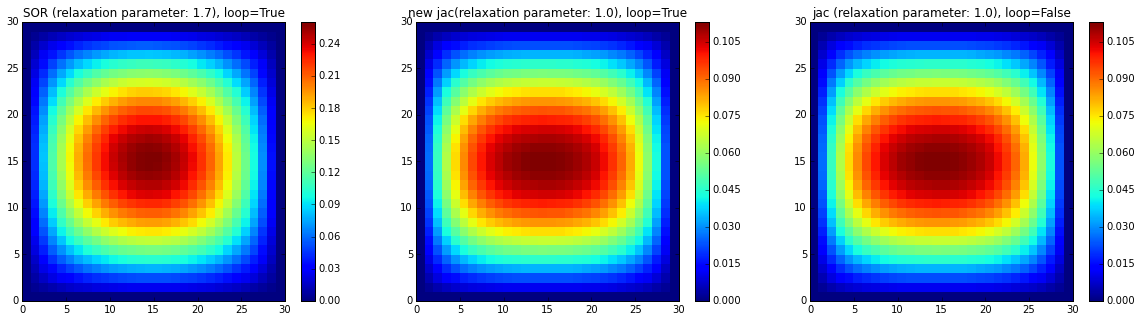

In [3]:
%matplotlib inline
theFig=plt.figure(figsize=(20,5))

print ('The LHS polt:')
theAx=theFig.add_subplot(131)
psi_1=qg(100, 'sor',loop=True)
plt.pcolor(psi_1.T)
plt.title('SOR (relaxation parameter: 1.7), loop=True')
plt.colorbar()

print ('')
print ('The middle one:')
theAx=theFig.add_subplot(132)
psi_2= qg(100, 'jac',loop=True)
plt.title('new jac(relaxation parameter: 1.0), loop=True')
plt.pcolor(psi_2.T)
plt.colorbar()

print ('')
print ('The RHS plot')
theAx=theFig.add_subplot(133)
psi_3=qg(100, 'jac',loop=False)
plt.pcolor(psi_3.T)
plt.title('jac (relaxation parameter: 1.0), loop=False')
plt.colorbar()

plt.show()

## Part 1:

>**Q:**Set loop=True, and compare the efficiency  of  the  SOR  method and the Jacobi iteration.


**A:**The plot **at the left hand side** and **the middle** are executed by **the SOR method** and **the Jacobi iteration** respectively, **with loop=True**. The words above show the iteration step for each method. The total interarion steps for jacobi method is 100, while the SOR method only interacted for 43 times.

As we set the maximum iterations to be 50 for the 'relax' function and the function was executed twice to calculate psi, the number 100 in jacobi method means every time we called the 'relax' function, it hit its maximum iterations. As for the SOR method, we can see the relaxation converged very quickly. Instead of interacting for 100 times, it solved the solution with only 43 interations.


>**Q**: Compare to indexing the loops and doing Jacobi interation by setting loop=False.

**A:** The plot **at the right hand side** used the option of **loop=False**, which means it executed the Jacobi method with C language. To understand how efficient it is, we can compare it with the middle one. From the printed information above, it is clear to say the duration of the relaxation function using Python loop is less efficient. For the python loop, it took 0.185 sec to finish the function but C took only 0.003 sec. 

## Part 2:

>**Q**:Using the most efficient scheme, choose one parameter of the problem

**A**:For the question two, I vary the wind stress to test how the streamfuction changes. The wind field is a negative cosine curve from southern boundary to northern boundary, which means the wind curl is positive at the north and negative at the south.

In my settings, the wind stress are:


==============================

figures at LHS           : 0.2(reference plot)

figures at middle        : 0.1

figures at RHS           : 0.4

==============================

**The following plots show different wind stress schemes at time 1e5, 1e6 and 1e7. **

**We can choose the plots at time 1e7 (fig7,8,9) to analyze.**

==============================

figure 7           : 0.2(reference plot)

figure 8        : 0.1

figure 9           : 0.4

==============================

If we decrease the wind stress, the non-linear term in the qg equation decreases as well. Comparing to the reference plot(fig 7), we can see both of the flow moves to the west but the shape in the reference plot is more northern than the one in fig.8.

With an increasing wind stress, the streamfunction in fig.9 hit the northern boundary faster than the reference plot (fig.7), which is caused by the enhanced the non-linear effect.

#### Change Wind stress

In [8]:
from numlabs.lab8.qg2 import *
%matplotlib inline
def depth(time,label):
    theFig=plt.figure(figsize=(20,10))
    print ('The LHS polt:')
    theAx=theFig.add_subplot(231)
    psi_4=qg(500,5.e-2,0.2,time, 'jac',loop=False)
    plt.pcolor(psi_4.T)
    plt.title('Fig %s. Wind stress: 0.2 (Time:%s)'%(label,time))
    plt.colorbar()

    print ('');print ('The middle one:')
    theAx=theFig.add_subplot(232)
    psi_5=qg(500,5.e-2,0.1,time, 'jac',loop=False)
    plt.pcolor(psi_5.T)
    plt.title('Fig %s. Wind stress: 0.1 (Time:%s)'%(label+1,time))
    plt.colorbar()

    print ('');print ('The RHS plot')
    theAx=theFig.add_subplot(233)
    psi_6=qg(500,5.e-2,0.4,time, 'jac',loop=False)
    plt.title('Fig %s. Wind stress: 0.4 (Time:%s)'%(label+2,time))
    plt.pcolor(psi_6.T)
    plt.colorbar()

    theAx=theFig.add_subplot(235)
    plt.pcolor((psi_5-psi_4).T)
    plt.title('Difference between Fig %s.and Fig %s. '%(label,label+1))
    plt.colorbar()

    theAx=theFig.add_subplot(236)
    plt.pcolor((psi_6-psi_4).T)
    plt.title('Difference between Fig %s.and Fig %s. '%(label,label+2))
    plt.colorbar()

    plt.show()

The LHS polt:
Wind stress maximum    =  0.2

The middle one:
Wind stress maximum    =  0.1

The RHS plot
Wind stress maximum    =  0.4


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


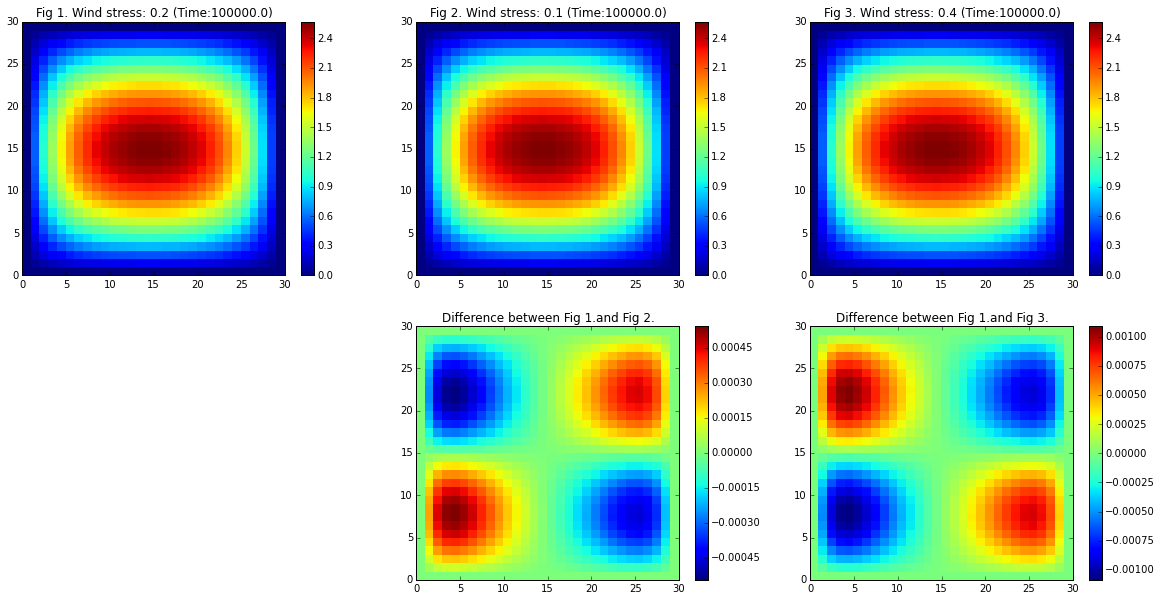

In [10]:
#T=1e5 (the flow is still moving, and the west intensification havn't shown up.)
depth(time=1e5,label=1)

The LHS polt:
Wind stress maximum    =  0.2

The middle one:
Wind stress maximum    =  0.1

The RHS plot
Wind stress maximum    =  0.4


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


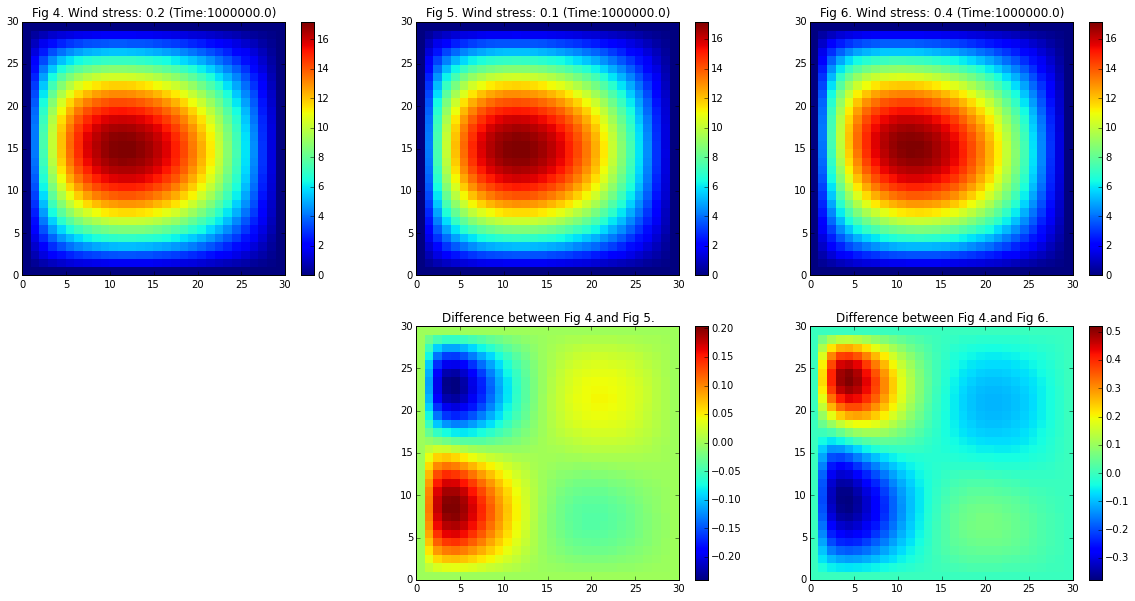

In [18]:
#T=1e6 (the flow began west intensification at its western boundary.)
depth(time=1e6,label=4)

The LHS polt:
Wind stress maximum    =  0.2

The middle one:
Wind stress maximum    =  0.1

The RHS plot
Wind stress maximum    =  0.4


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


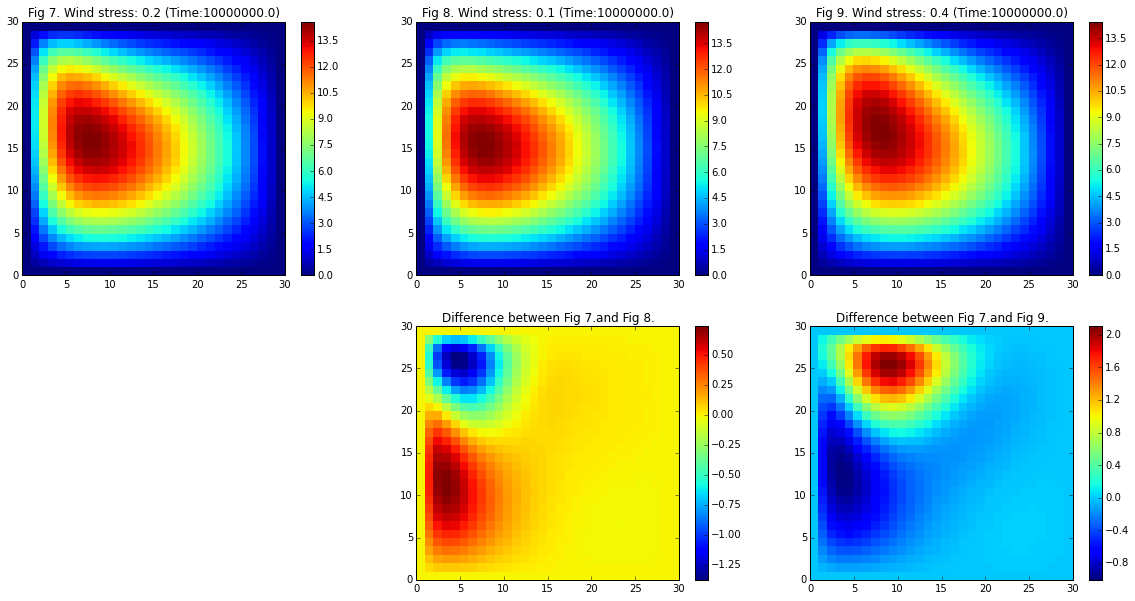

In [19]:
#T=1e7. The western intensification is pretty obvious and stable.
depth(time=1e7,label=7)

The LHS polt:
Wind stress maximum    =  0.2

The middle one:
Wind stress maximum    =  0.1

The RHS plot
Wind stress maximum    =  0.4


/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


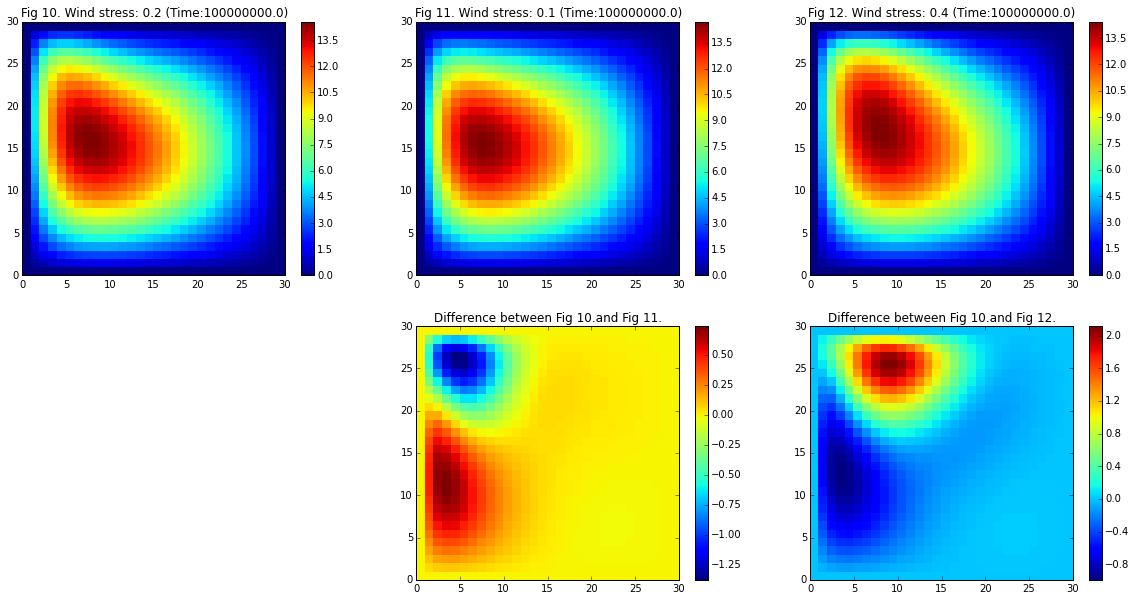

In [21]:
#T=1e8. The plots looks similar with T=1e7.
depth(1e8,label=10)

## Part 3.

In [1]:
from numlabs.lab8.qg3 import *
%matplotlib inline

>**Q:**ontinue to use the most ecient scheme.  Set the wind-stress to zero.
Initialize the stream-function (both psi
1 and psi
2) with a blob of 
uid
somewhere over to the east (say a Gaussian 3/4 of the way across with
a radius of several grid points). 


**A:**

**Time-scale of the westward movement:**
After the gaussian function was added for the initial flow field, the streamfunction changed very fast at the beginning because the fluid have to 'flaten its peak'. Here is an example:

When time=1e5, the flow in fig.13 (with initial condition) has already start the westward movement while the one without initial condition in fig.1 still moves in both directions.


**Time-scale of the steady state:**
Since the flow with gaussian function starts moving westward earlier than the one without initial condition (because of pressure gradient), theoritically the former scheme will first reaches steady state.

But in our numerical result, this is not that obvious. The time-scale of reaching steady state for the former scheme is around 1e7, which is similar with the one without initial condition.

/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


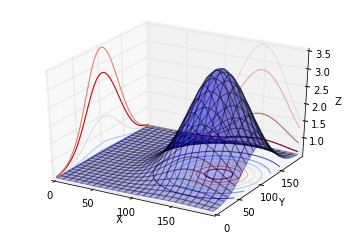

In [11]:
#test my Gaussian function
makeGaussian(200)

/home/xiaoxiny/anaconda/envs/mypython3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


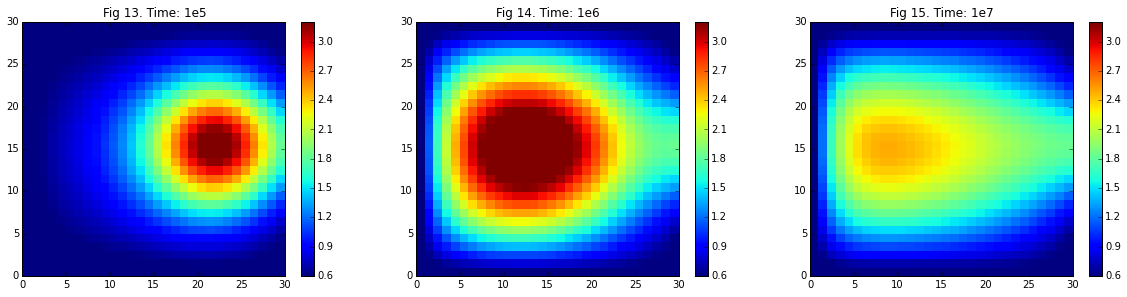

In [4]:
theFig=plt.figure(figsize=(20,10))
theAx=theFig.add_subplot(231)
psi_4=qg(1e5, 'jac',loop=False)
plt.pcolor(psi_4.T,vmin=0.6,vmax=3.2)
plt.title('Fig 13. Time: 1e5');plt.colorbar()


theAx=theFig.add_subplot(232)
psi_4=qg(1e6, 'jac',loop=False)
plt.pcolor(psi_4.T,vmin=0.6,vmax=3.2)
plt.title('Fig 14. Time: 1e6');plt.colorbar()

theAx=theFig.add_subplot(233)
psi_4=qg(1e7, 'jac',loop=False)
plt.pcolor(psi_4.T,vmin=0.6,vmax=3.2)
plt.title('Fig 15. Time: 1e7');plt.colorbar()

plt.show()

At fig13, the flow already have an obvious westward movement. And at T=1e6, the effect of western intensification is formed. And at T=1e7, the flow is almost steady.